## Analisis Tugas Hands-on 1

1. **Membuat Gelombang Sinus dan Cosinus**:
   - Buat array `t` yang berkisar dari 0 hingga 2 dengan langkah sebesar 0.0001.
   - Buat sinyal-sinyal berikut menggunakan array waktu ini:
     1. $y1 = 2 \cdot \sin(2 \pi \cdot 3 \cdot t + 0)$
     2. $y2 = 1 \cdot \cos(2 \pi \cdot 4 \cdot t + \pi/4)$
     3. $y3 = -1 \cdot \sin(2 \pi \cdot 5 \cdot t + \pi/2)$
     4. $y4 = 0.5 \cdot \cos(2 \pi \cdot 6 \cdot t + \pi)$

Kita dapat menggunakan `np.arrange()` untuk membuat time interval dari 0 sampai detik ke-2.
Kita menggunakan rumus `Sine` untuk membuat fungsi gelombang dari Sin
$$
\text{signal} = A \cdot \sin (2 \pi f t)
$$


In [23]:
import numpy as np
import matplotlib.pyplot as plt

## Setup time interval
t = np.arange(0, 2, 0.0001)

## Create the first four fundamental wave
y1 = 2 * np.sin(2 * np.pi * 3 * t + 0)                
y2 = 1 * np.cos(2 * np.pi * 4 * t + np.pi / 4)         
y3 = -1 * np.sin(2 * np.pi * 5 * t + np.pi / 2)       
y4 = 0.5 * np.cos(2 * np.pi * 6 * t + np.pi)           

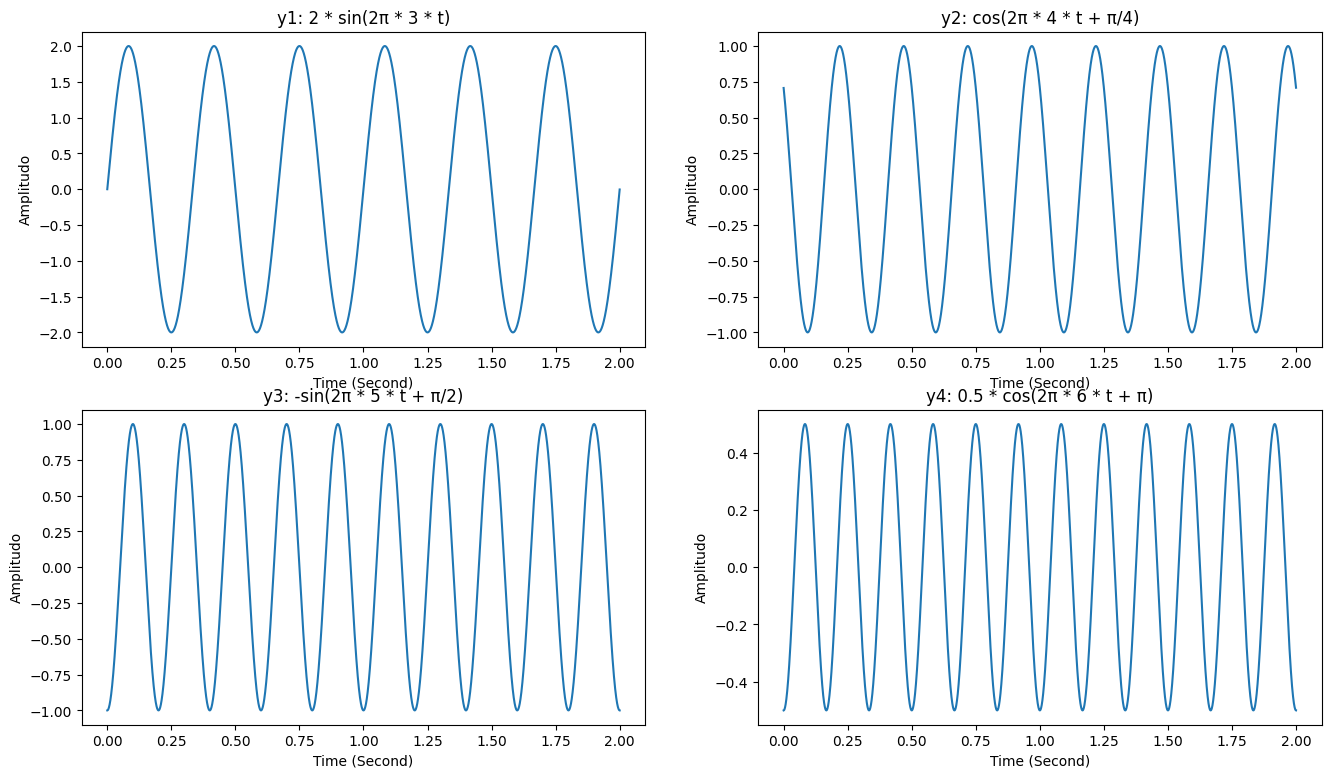

In [24]:
## Analisis Graph dengan Matplotlib
fig, axs = plt.subplots(2, 2, figsize=(16, 9))

# Plot y1
axs[0, 0].plot(t, y1)
axs[0, 0].set_title('y1: 2 * sin(2π * 3 * t)')

# Plot y2
axs[0, 1].plot(t, y2)
axs[0, 1].set_title('y2: cos(2π * 4 * t + π/4)')

# Plot y3
axs[1, 0].plot(t, y3)
axs[1, 0].set_title('y3: -sin(2π * 5 * t + π/2)')

# Plot y4
axs[1, 1].plot(t, y4)
axs[1, 1].set_title('y4: 0.5 * cos(2π * 6 * t + π)')

# Giving Label
for axis in axs.flat:
    axis.set(xlabel="Time (Second)", ylabel="Amplitudo")

plt.show()

## Analisis Gelombang
3. Pertanyaan Analisis 
- Untuk masing-masing Amplitudo dan Frekuensi, dapat ditemukan dalam persamaan gelombang sine yakni:
$$
\text{signal} = A \cdot \sin (2 \pi f t + \phi)
$$

Maka untuk hasil tersebut didapatkan
- y1 : A = 2, f = 3
- y2 : A = 1, f = 4
- y3 : A = -1, f = 5
- y4 : A = 0.5, f = 6

- Pengaruh dari _phase shift_ itu sendiri membuat bagaimana gelombang tersebut dimulai. Misalnya untuk `y3`, didapatkan bahwa karena fungsi tersebut negatif (berati terbalik, dan kita geser fungsi dari yang seharusnya dimulai dari titik 0 sebesar `90` derajat agar berada pada titik -1).

- Pengaruh amplitudo dan frekuensi disini sangat cukup penting dimana Amplitudo akan memberikan gelombang yang lebih tinggi, sebaliknya frekuensi berpengaruh dalam rapat-longgarnya gelombang-gelombang dalam kurun waktu 1 detik

- Pengaruh fase sangat penting karena mengacu bagaimana fungsi gelombang tersebut dimulai, namun tidak mengubah bentuk dari gelombang secara keseluruhan


## Tugas Tamabahan
4. Penambahan sinyal kombinasi dari y1 + y2 dan analisis sederhananya.

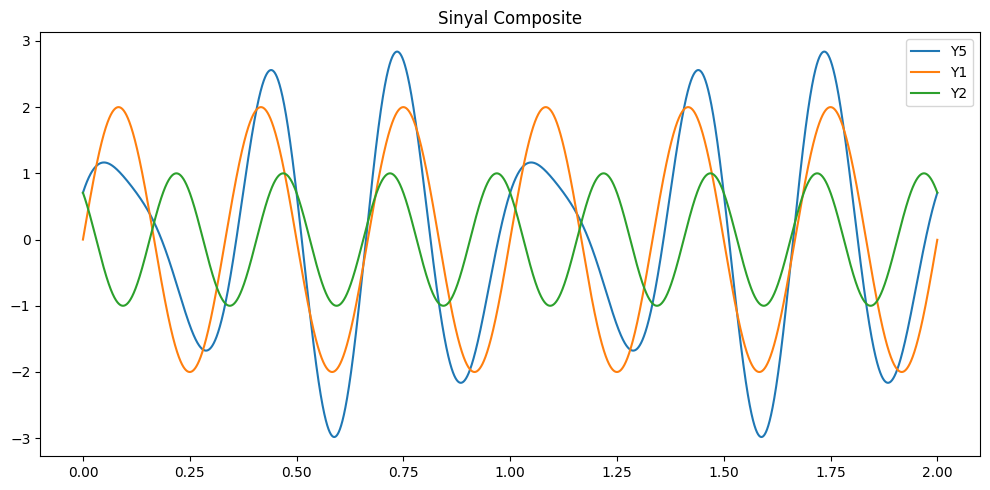

In [25]:
# Proses kombinasi gelombang
y5 = y1 + y2
t = np.arange(0, 2, 0.0001)

plt.figure(figsize=(10, 5))
plt.plot(t, y5)
plt.plot(t, y1)
plt.plot(t, y2)
plt.title("Sinyal Composite")
plt.legend(["Y5", "Y1", "Y2"])
plt.tight_layout()
plt.show()


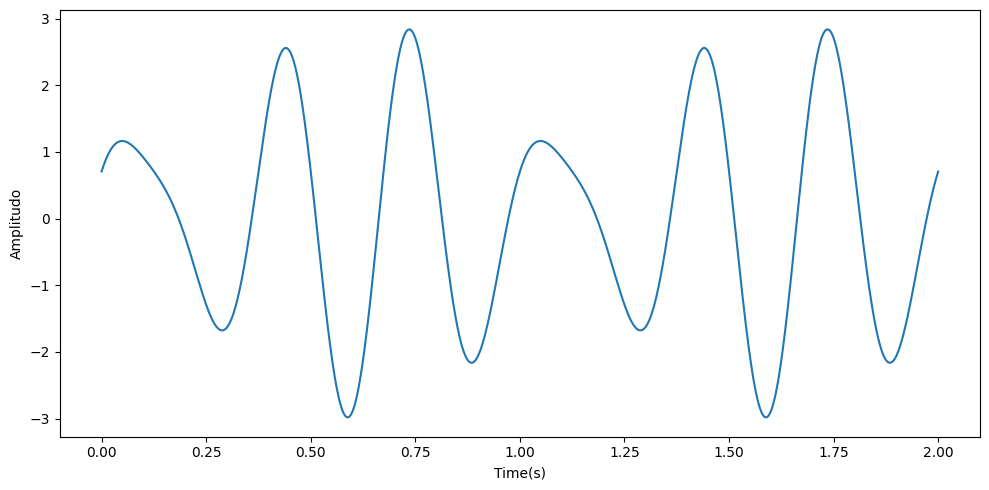

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(t, y5)
plt.xlabel("Time(s)")
plt.ylabel("Amplitudo")
plt.tight_layout()
plt.show()

## Analisis Sederhana
Berdasarkan kombinasi dari `Sine` dan `Cosine` wave satu ini, dapat dilihat terbaut sebuah gelombang baru dari kedua penjumlahan gelombang tersebut. Disini juga dapat dilihat properti dari gelombang, dimana pada penjumlahan di tiap titik, kedua gelombang bisa saling memperkuat (inference konstruktif) dimana amplitudo gelombang `y5` semakin besar dan saling melemahkan (inference desktruktif) dan bisa kita lihat pada bagian awal gelombang ini yang menurun.

## Analisis Downsampling
5. Diberikan sebuah sinyal ECG sintensis, dan dilakukan sebuah analisis proses downsampling untuk membuktikan bahwa undersampling membuat sebuah distorsi:

Diberikan sebuah spesifikasi gelombang berikut
    - Durasi: `Berdasarkan 3 digit terakhir nim anda`
    - Sampling Rate: `150 Hz`
    - Noise Level: `0.<2 digit nim terakhir>`
    - Heart Rate: `80` BPM
    - Random State: `tanggal bulan tahun lahir anda` dengan format YYMMDD misalnya `240925`


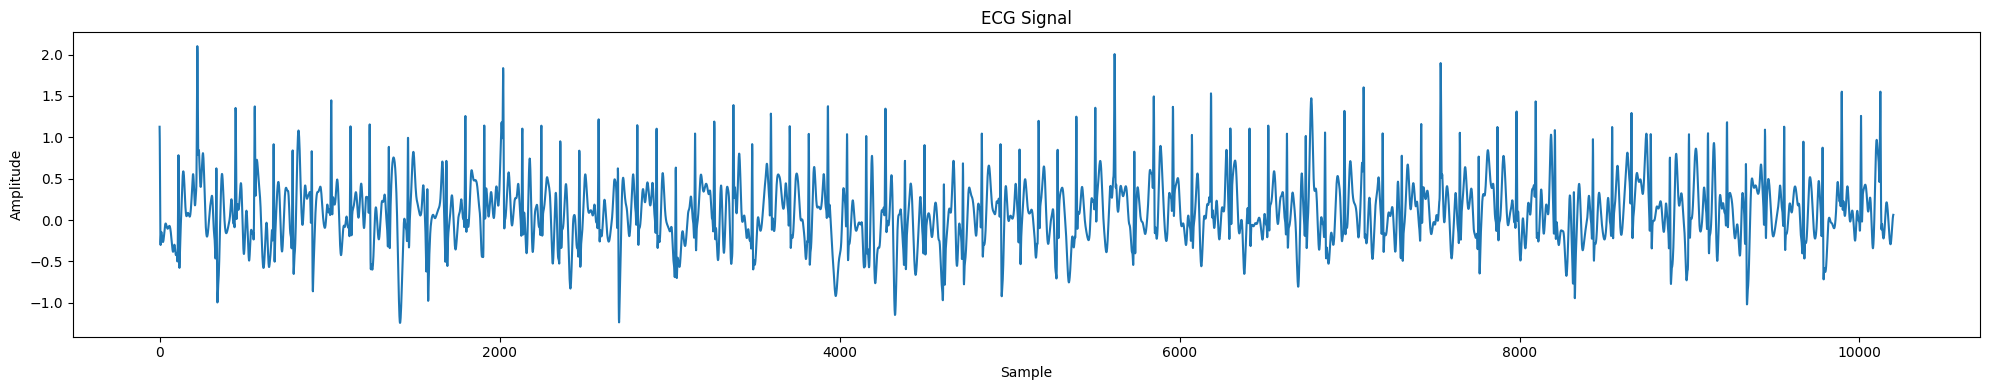

In [92]:
import neurokit2 as nk

time_interval = 68 # 068 as the time interval
sampling_rate_150 = 150 # Sampling rate
noise_level = 0.68 # Noise level
bpm = 80 # Heart rate
random_state = 171003 # Id that got used to be an identifier as the random state

## Original wave
original_wave = nk.ecg_simulate(duration = time_interval, sampling_rate=sampling_rate_150, heart_rate = bpm, noise= noise_level, random_state = random_state)

plt.figure(figsize=(20, 4))
plt.plot(original_wave)
plt.title("ECG Signal")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()


Pada tugas kali, ini akan dilakukan prosses downsampling dari 150Hz ke 100Hz, 50Hz, 25Hz, 10Hz, hingga 5Hz.

Seperti yang kalian ketahui terdapat beberapa relasi antara sampling_rate (frekuensi), jumlah sampel data dan waktu interval yang ditentukan dalam formula berikut
$$
    \text{time length} = \frac{\text{length of sound data (samples)}}{\text{sampling rates}}
$$


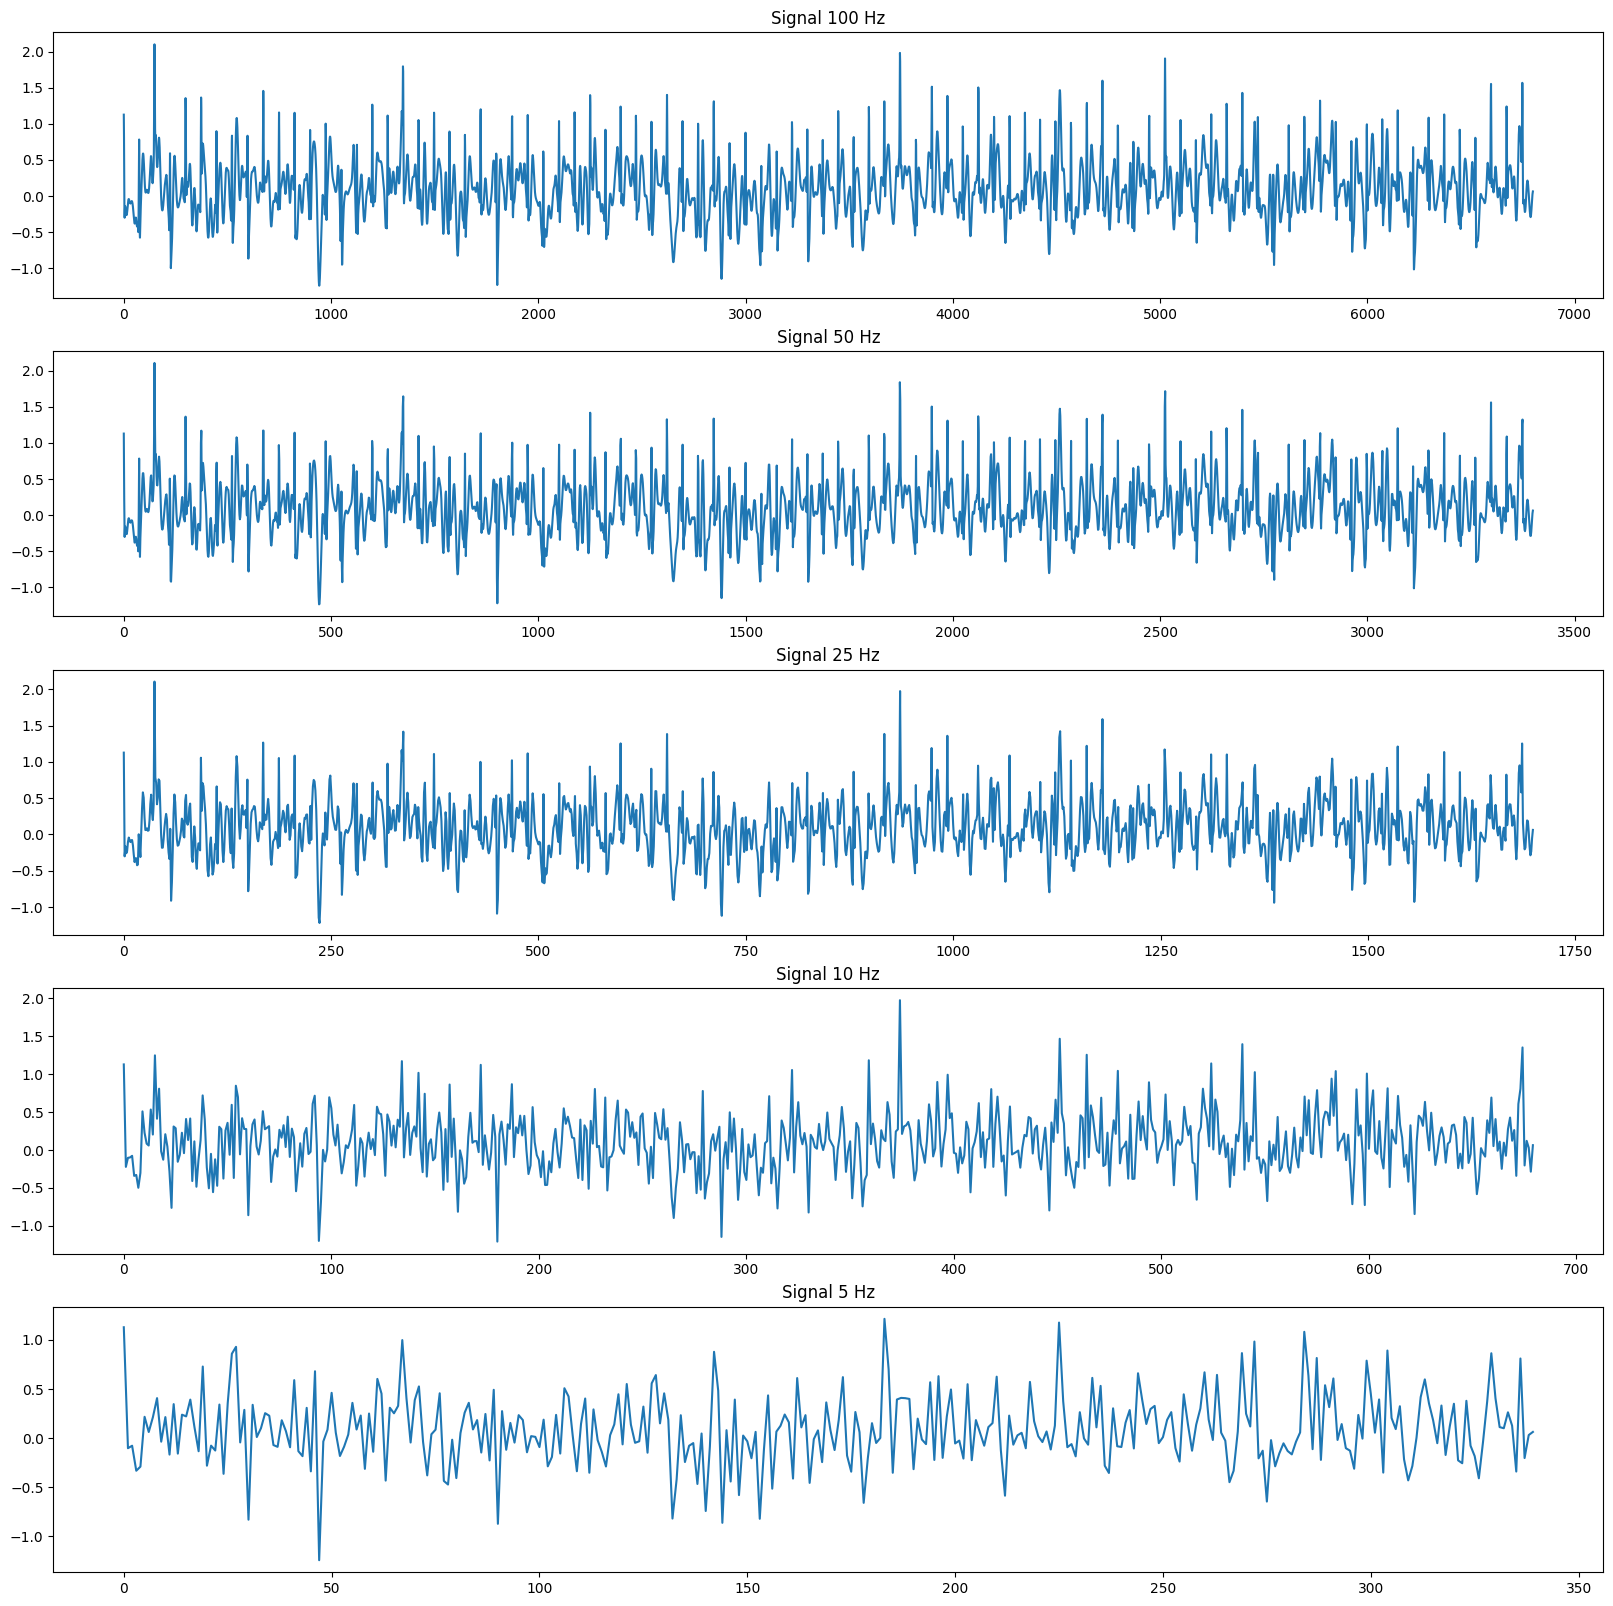

In [93]:
## 100 Hz as the new sampling_rates
samping_rate_100 = 100
modified_length_100 = len(original_wave) * (samping_rate_100 / sampling_rate_150)
resampled_signal_100 = nk.signal_resample(original_wave, desired_length=int(modified_length_100))

## 50 Hz as the second sampling_rates
samping_rate_50 = 50
modified_length_50 = len(original_wave) * (samping_rate_50 / sampling_rate_150)
resampled_signal_50 = nk.signal_resample(original_wave, desired_length=int(modified_length_50))

## 25 Hz as the third sampling_rates
samping_rate_25 = 25
modified_length_25 = len(original_wave) * (samping_rate_25 / sampling_rate_150)
resampled_signal_25 = nk.signal_resample(original_wave, desired_length=int(modified_length_25))

## 10 Hz as the fourth sampling_rates
samping_rate_10 = 10
modified_length_10 = len(original_wave) * (samping_rate_10 / sampling_rate_150)
resampled_signal_10 = nk.signal_resample(original_wave, desired_length=int(modified_length_10))

## 5 Hz as the fifth sampling_rates (extreme one)
samping_rate_5 = 5
modified_length_5 = len(original_wave) * (samping_rate_5 / sampling_rate_150)
resampled_signal_5 = nk.signal_resample(original_wave, desired_length=int(modified_length_5))


ax, fig = plt.subplots(5 ,1, figsize=(20, 20))
fig[0].plot(resampled_signal_100)
fig[0].set_title("Signal 100 Hz")
fig[1].plot(resampled_signal_50)
fig[1].set_title("Signal 50 Hz")
fig[2].plot(resampled_signal_25)
fig[2].set_title("Signal 25 Hz")
fig[3].plot(resampled_signal_10)
fig[3].set_title("Signal 10 Hz")
fig[4].plot(resampled_signal_5)
fig[4].set_title("Signal 5 Hz")

plt.show()

## Analisis Gelombang
5. Berdasarkan hasil kelima gelombang yang telah di lakukan proses Downsampling ini, didapatkan bahwa terjadi aliasing yang cukup ekstrim pada sinyal dengan sampling_rate `5Hz` dan `10Hz` yang dapat dilihat dari sinyal yang putus-putus, namun karena noise yang didapat dari sinyal orisinil yang cukup besar (`sekitar`), sulit untuk melihat aliasing pada sinyal dengan frekuensi `100`, `50` dan `25`.

Aliasing sendiri merupakan sebuah konsep dimana tidak akuratnya data (distorsi), sehingga menyebabkan kesalahan dalam rekonstruksi (pembuatan) sinyal tersebut. Aliasing sendiri biasanya terjadi karena sampel yang diambil memiliki frekuensi yang rendah (`undersampling`), sehingga menyebabkan sinyal yang tidak cukup mulus (patah-patah) ketika di visualisasikan [[1]](https://www.techopedia.com/definition/1943/aliasing). 

Teorema `Nynquist-Shanning Sampling` menyatakan bahwa untuk membuat sebuah sinyal secara akurat tanpa aliasing, dibutuhkan setidaknya `2 kali` dari frekuensi maksimal dari sebuah sinyal agar dapat akurat (`sampling rate`), hal ini dinamakan dengan `frekuensi nynquist`

Satu cara untuk visualiasi `Nyquist Theorem` adalah sebagai berikut:
- Contoh kasus, batas pendengaran manusia terletak pada interval 20 sampai 20.000 (20 kHz), disini dapat digunakan `20 khz` sebagai batas frekuensi maksimal sehingga sampling rate yang dibutuhkan `40 kHz` sebagai minimum, namun biasanya `44.1 kHz` digunakan sebagai basis.

Untuk `ECG` sendiri yang mengukur aktivitas otot jantung, didapatkan bahwa nilai minimal dari `frekuensi maksimum` otot jantung adalah `50 hz` sehingga nilai minimum `sampling rate` yang dibutuhkan agar tidak aliasing adalah `100 Hz` [[2]](https://www.researchgate.net/post/What_is_the_minimum_acceptable_sampling_frequency_for_ECG_signals).

Namun perlu dilihat juga pada kasus ini, nilai `noise` yang digunakan pada sinyal original cukup besar sehingga susah untuk melihat Alisasing dengan `noise` yang cukup besar.

Hasil Percakapan AI-LLM : 
- [1. Downsampling & Nynquist Theorem](https://chatgpt.com/share/66f52bc9-df04-800c-8cd8-e762b9149ba7)